# Nilearn ttutorial 3
with Miyawaki 2008 dataset

In [1]:
%matplotlib inline 
import seaborn

import nilearn
import numpy as np
import matplotlib.pyplot as plt

## Load data using nilearn dataset fetching

In [2]:
from nilearn import datasets
miyawaki_ds = datasets.fetch_miyawaki2008()

In [3]:
print ('First functional nifti image(4D) is located at: %s' %miyawaki_ds.func[0])

First functional nifti image(4D) is located at: /home/farahana/nilearn_data/miyawaki2008/func/data_figure_run01.nii.gz


### as the dataset has already been masked, no bg_img needed

In [4]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker()
masker.fit (miyawaki_ds.func[0]) # the BOLD/nifti image of first data/subj

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=None, mask_strategy='background',
      memory=Memory(cachedir=None), memory_level=1, sample_mask=None,
      sessions=None, smoothing_fwhm=None, standardize=False, t_r=None,
      target_affine=None, target_shape=None, verbose=0)

### preprocess the data and labels

In [5]:
miyawaki_bold = miyawaki_ds.func[12:]
miyawaki_label = miyawaki_ds.label[12:]

In [6]:
from nilearn.input_data import MultiNiftiMasker
# the dataset is compilation of many files, thus, need multiniftimasker
miyawaki_masker = MultiNiftiMasker(mask_img=miyawaki_ds.mask, detrend=True, standardize=True)

In [7]:
miyawaki_masker.fit()
miyawaki_fmri = miyawaki_masker.transform(miyawaki_bold)

In [8]:
label_shape = (10,10)
label = []
for label_run in miyawaki_label:
    label.append(np.reshape(np.loadtxt(label_run, dtype=np.int, delimiter=','), (-1,)+label_shape, order='F'))

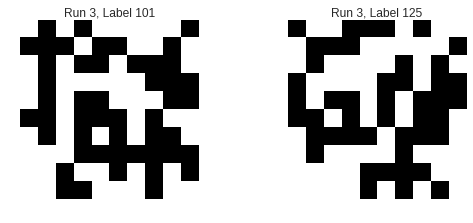

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(label[0][100], interpolation='nearest', cmap='gray')
plt.axis('off')
plt.title('Run {}, Label {}'.format(3,101))

plt.subplot(1,2,2)
plt.imshow(label[0][124], interpolation='nearest', cmap='gray')
plt.axis('off')
plt.title('Run {}, Label {}'.format(3,125))
plt.subplots_adjust(wspace=0.5)